# Data Processing

In [127]:
! python mkt_data_processing.py

Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4/train.csv
Processed data saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4/test.csv


In [1]:
import sys
from pathlib import Path
from train import train_model, hyper_parameter_tuning
from neural_network_trainer import NeuralNetworkTrainer
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# ML Hyper-parameter tuning

In [1]:
param_grids = {
        "knn": {
            "n_neighbors": [3, 5, 7, 9]
        },
        "svm": {
            "kernel": ["rbf"],
            "C": [0.1, 1, 10],
            "gamma": ["scale", "auto", 0.2, 0.8]
        },
        "xgboost": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 6, 9]
        }
    }

In [ ]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid")

# ML Training

In [10]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost.yaml"
train_model(config_path)

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\test.csv...
Initializing the xgboost model...
Training the model...
Evaluating the model...
XGBOOST Model Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       379
           1       0.64      0.43      0.52        69

    accuracy                           0.88       448
   macro avg       0.77      0.69      0.72       448
weighted avg       0.86      0.88      0.86       448

XGBOOST F1 Score: 0.5172413793103449
Evaluation results saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\results\xgboost_results.json
XGBOOST Model saved to C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\model_checkpoints\xgboost_model.pkl


# ML Debug

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v4\test.csv...
Initializing the xgboost model...


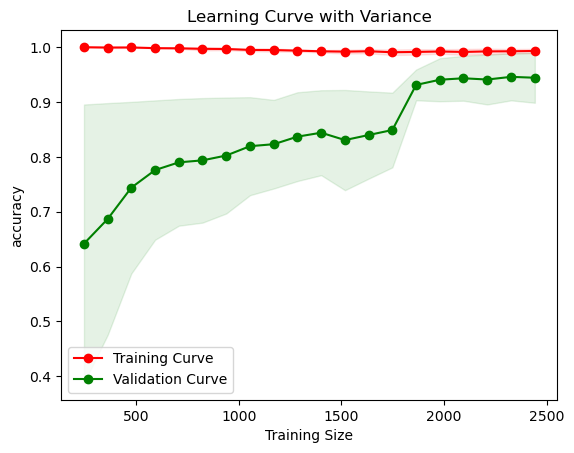

In [7]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

config_path = project_root / "configs" / "xgboost.yaml"
train_model(config_path, debug=True)

# Validation Curve

In [15]:
param_grids = {
        # "knn": {
        #     "n_neighbors": [3, 5, 7, 9, 12, 15, 20, 30]
        # },
        # "svm": {
        #     "kernel": ["rbf"],
        #     "C": [0.1, 0.5, 1, 3, 5, 10],
        #     "gamma": ["scale", "auto", 0.2, 0.8]
        # },
        "xgboost": {
            "n_estimators": [300],
            # "learning_rate": [0.01, 0.1, 0.2],
            # "max_depth": [1, 2, 3, 6, 9, 12, 15], 
            # "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1],
            "min_samples_leaf": [1, 5, 10, 15, 20]
        }
    }

Loading training data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v1\train.csv...
Loading test data from C:\Meta Directory\Gatech\Machine Learning\HW\HW1\hw1_repo\datasets\cleaned_data\mkt_camp_v1\test.csv...
Initializing the xgboost model for hyperparameter tuning...
Performing hyperparameter tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters: {'min_samples_leaf': 1, 'n_estimators': 300}
Best cross-validation accuracy: 0.8911801669066253
Retraining the model with the best hyperparameters...
Evaluating the best model on the test set...
XGBOOST Model Accuracy: 0.8705357142857143
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       379
           1       0.58      0.55      0.57        69

    accuracy                           0.87       448
   macro avg       0.75      0.74      0.75       448
weighted avg       0.87      0.87      0.87       448

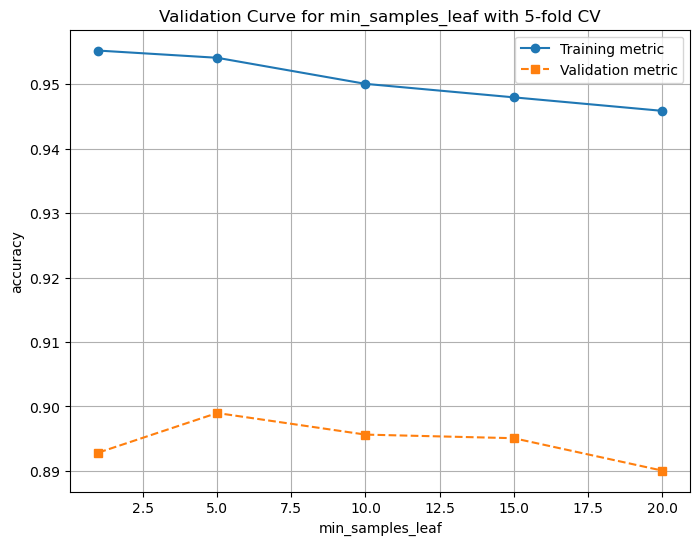

(GradientBoostingModel(n_estimators=300),
 {'min_samples_leaf': 1, 'n_estimators': 300},
 0.8911801669066253)

In [16]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "xgboost.yaml"
hyper_parameter_tuning(config_path, param_grids, "grid", validation_curve=True, param_name="min_samples_leaf")

# Neural Network Parameter Tuning

In [12]:
param_grid = {
            "num_layers": [2, 3],
            "hidden_sizes": [64, 128, 256],
            "learning_rate": [0.001, 0.01],
            "activation": ["relu", "tanh", "sigmoid"],
            "epochs": [10, 20],
            "batch_size": [32, 64, 128]
        }

In [ ]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "nn.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
best_model, best_params = trainer.tune_hyperparameters(param_grid)

# Neural Network Training

In [4]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "nn.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.train_and_evaluate()

Loading training data...
Loading test data...
Initializing model...
Training model...
Epoch 1/20, Loss: 0.6480
Epoch 2/20, Loss: 0.5692
Epoch 3/20, Loss: 0.5063
Epoch 4/20, Loss: 0.4688
Epoch 5/20, Loss: 0.4334
Epoch 6/20, Loss: 0.4068
Epoch 7/20, Loss: 0.3840
Epoch 8/20, Loss: 0.3553
Epoch 9/20, Loss: 0.3426
Epoch 10/20, Loss: 0.3204
Epoch 11/20, Loss: 0.3194
Epoch 12/20, Loss: 0.3287
Epoch 13/20, Loss: 0.3146
Epoch 14/20, Loss: 0.3017
Epoch 15/20, Loss: 0.2922
Epoch 16/20, Loss: 0.3005
Epoch 17/20, Loss: 0.2939
Epoch 18/20, Loss: 0.2882
Epoch 19/20, Loss: 0.2942
Epoch 20/20, Loss: 0.2882
Evaluating model...
{'0': {'f1-score': 0.9283018867924528,
       'precision': 0.8870192307692307,
       'recall': 0.9736147757255936,
       'support': 379.0},
 '1': {'f1-score': 0.43564356435643564,
       'precision': 0.6875,
       'recall': 0.3188405797101449,
       'support': 69.0},
 'accuracy': 0.8727678571428571,
 'macro avg': {'f1-score': 0.6819727255744442,
               'precision': 0.7

# Neural Network Debug

Loading training data...
Loading test data...
Initializing model...


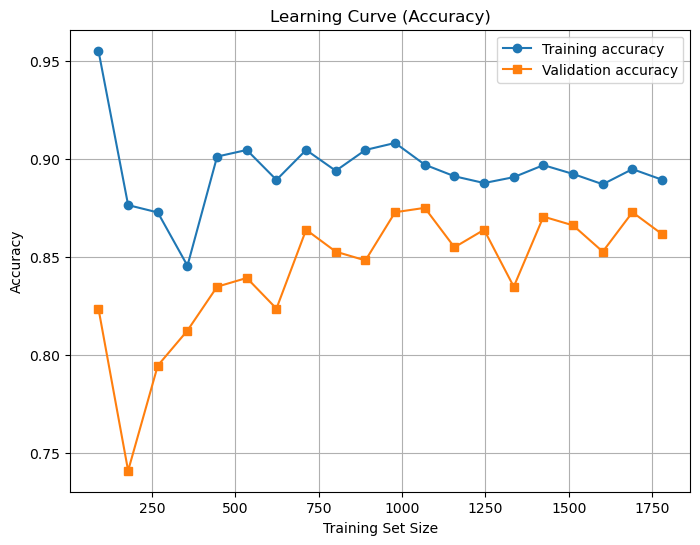

Loss curve


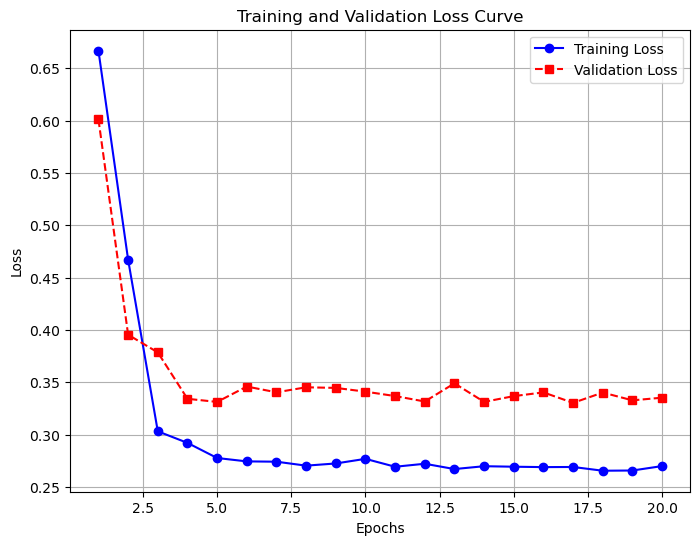

In [106]:
project_root = Path.cwd().parent
sys.path.append(str(project_root)) 

config_path = project_root / "configs" / "nn.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.train_and_evaluate(debug=True)

# Validation Curve

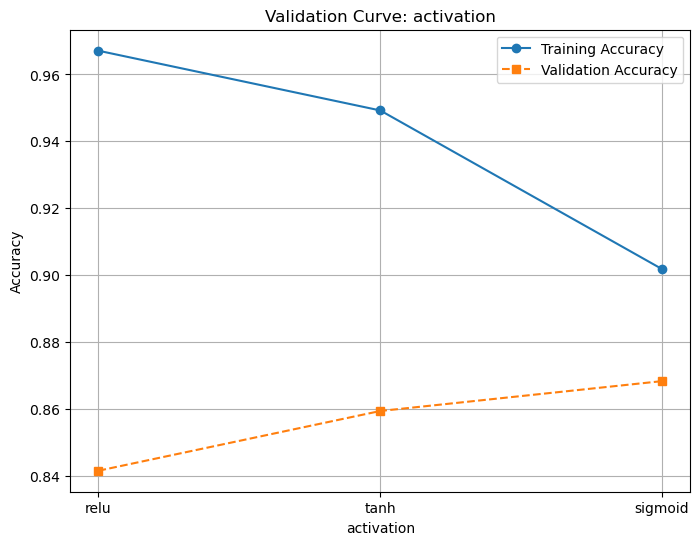

In [108]:
param_grid = {
            "num_layers": [2, 3, 4, 5, 6, 8],
            "hidden_sizes": [64, 128, 256],
            "learning_rate": [0.001, 0.005, 0.01],
            "activation": ["relu", "tanh", "sigmoid"],
            "epochs": [10, 15, 20],
            "batch_size": [32, 64, 128],
            "use_batchnorm": ["True", "False"],
            "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5]
        }

project_root = Path.cwd().parent
sys.path.append(str(project_root)) 
config_path = project_root / "configs" / "nn.yaml"

trainer = NeuralNetworkTrainer(config_path=config_path, device="cuda")
trainer.plot_validation_curve("activation", param_grid)